# Implementation of Double Q-Learning on FrozenLake-v1

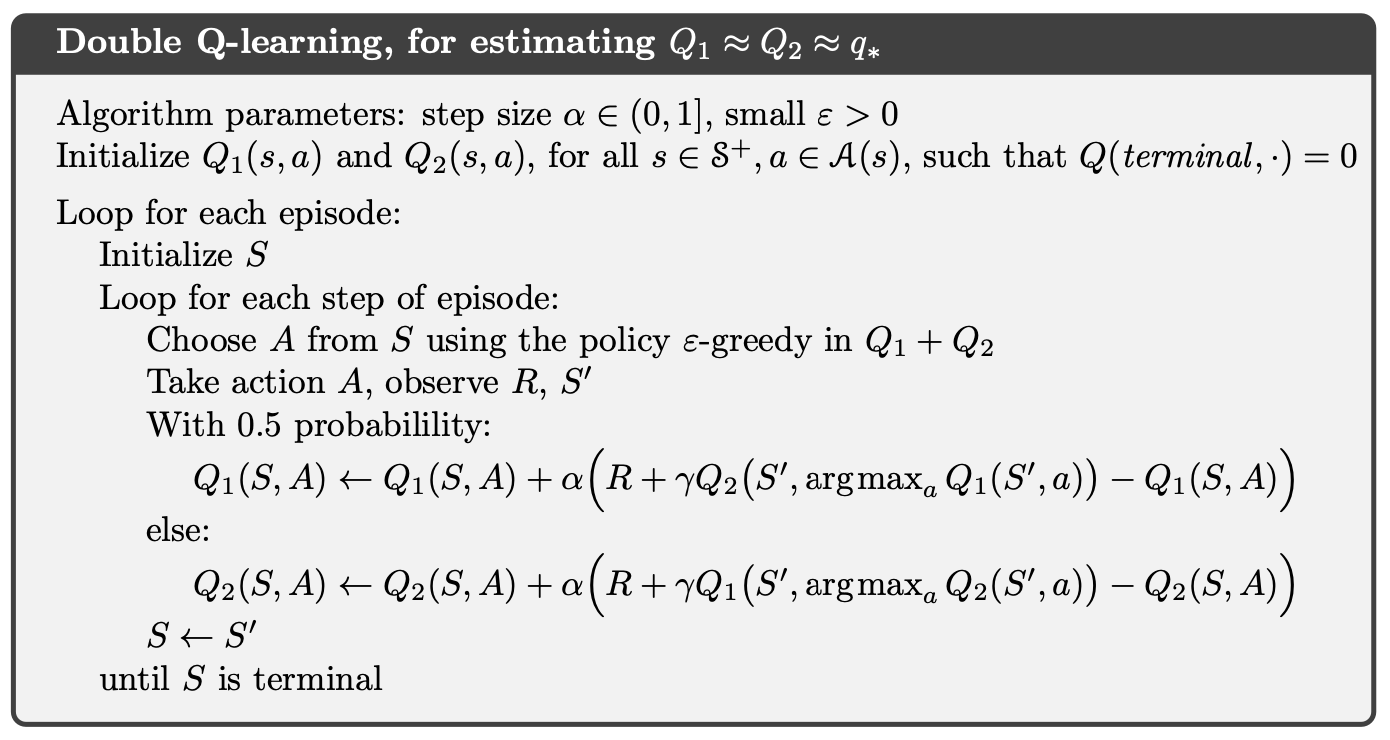

In [4]:
import gym
import numpy as np

# Parameters
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="human")
nS = env.observation_space.n 
nA = env.action_space.n 
gamma = 0.8
alpha = 0.1
epsilon = 0.1
maxEpisodes = 100

# Initialization
Q1 = np.zeros([nS, nA])
Q2 = np.zeros([nS, nA])

# Looping Forever
for episode in range(maxEpisodes):
    initialState, _ = env.reset()
    done = False
    currentEpisode = 0

    while not done:
        combinedQValues = Q1 + Q2
        action = None
        if np.random.random() < epsilon:
            action = np.random.randint(low=0, high=nA-1)
        else:
            action = np.random.choice(np.where(combinedQValues[initialState] == combinedQValues[initialState].max())[0])

        nextState, reward, done, _, _ = env.step(action)

        # If the agent is still on ice, then give penalty for not finding the treasure.
        if reward == 0:
            reward = -0.001
        
        # If the agent falls into the hole, give a large penalty
        if done and nextState != 15:
            reward = -1
        
        # If agent took too long, penalize
        if currentEpisode == 100:
            done = True
            reward = -1
        
        # Penalize if agent doesnt move
        if initialState == nextState:
            reward = -1
        
        if np.random.random() < 0.5:
            Q1[initialState][action] = Q1[initialState][action] + alpha * (reward + (gamma * Q2[nextState][np.argmax(Q1[nextState])]) - Q1[initialState][action])
        else:
            Q2[initialState][action] = Q2[initialState][action] + alpha * (reward + (gamma * Q1[nextState][np.argmax(Q2[nextState])]) - Q2[initialState][action])
        initialState = nextState
        currentEpisode += 1

/Users/jasonchen/anaconda3/envs/rl/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


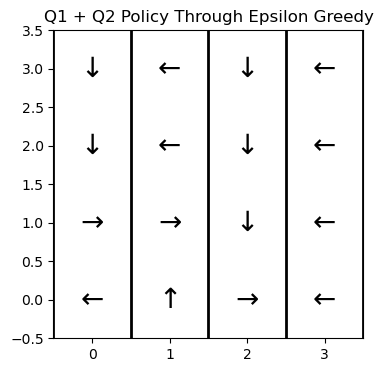

In [10]:
# Visualize the Policy
import matplotlib.pyplot as plt

def actionToArrow(action):
    if action == 0:
        return '←'
    elif action == 1:
        return '↓'
    elif action == 2:
        return '→'
    elif action == 3:
        return '↑'

nrow, ncol = 4, 4

combinedQValues = Q1 + Q2
fig, ax = plt.subplots(figsize=(ncol, nrow))
ax.set_xticks(np.arange(ncol+1)-0.5, minor=True)
ax.set_yticks(np.arange(nrow+1)-0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(which="minor", size=0)
ax.set_xlim(-0.5, ncol-0.5)
ax.set_ylim(-0.5, nrow-0.5)
ax.set_title("Q1 + Q2 Policy Through Epsilon Greedy")
for i in range(nrow):
    for j in range(ncol):
        action = np.argmax(combinedQValues[i*ncol + j])
        arrow = actionToArrow(action)
        ax.text(j, nrow-1-i, arrow, ha='center', va='center', fontsize=20)
plt.show()
env.close()

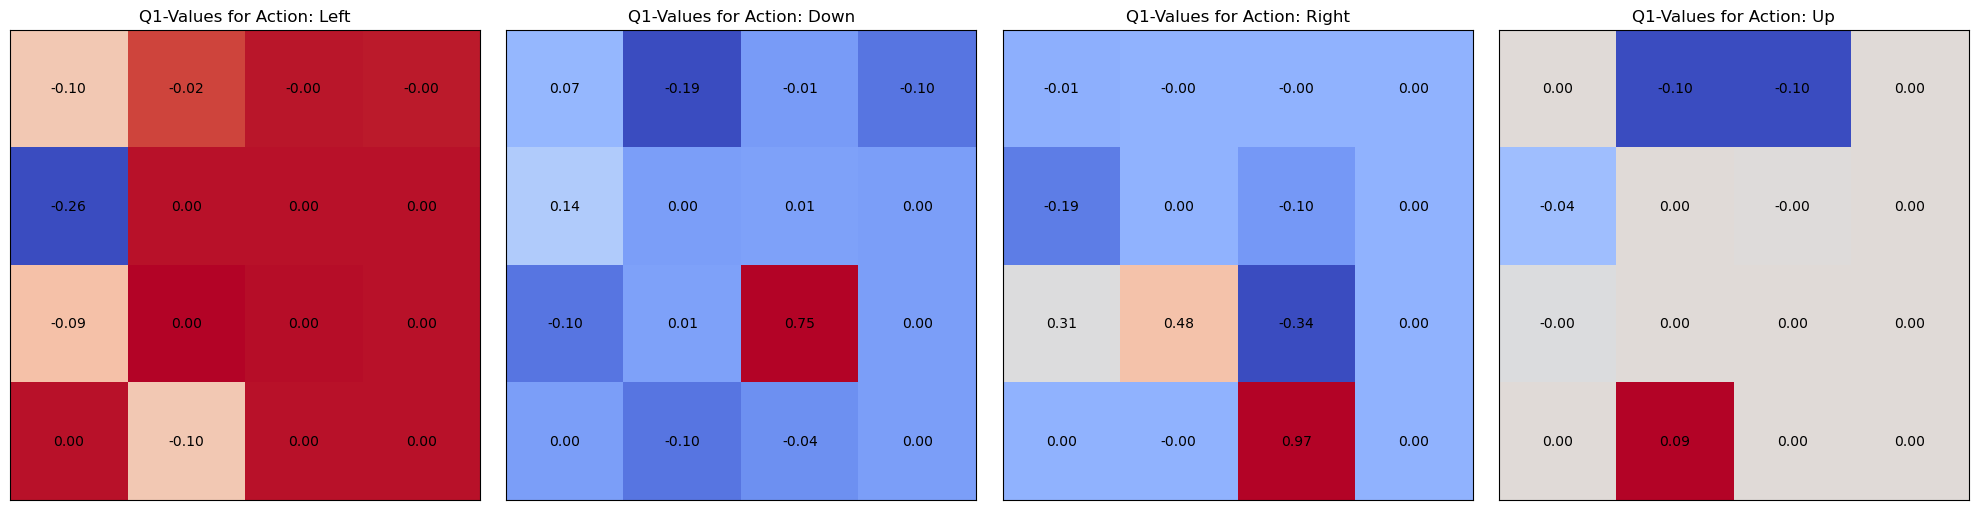

In [7]:
# Visualize the Policy
import matplotlib.pyplot as plt

# Visualize State Values as a Heatmap
fig, axes = plt.subplots(1, nA, figsize=(20, 5))
actions = ["Left", "Down", "Right", "Up"]

for i in range(nA):
    Q_action = Q1[:, i].reshape((4, 4))
    ax = axes[i]
    cax = ax.matshow(Q_action, cmap="coolwarm")
    for (j, k), val in np.ndenumerate(Q_action):
        ax.text(k, j, f'{val:.2f}', ha='center', va='center', color='black')
    ax.set_title(f'Q1-Values for Action: {actions[i]}')
    ax.set_xticks([])
    ax.set_yticks([])

# fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.025, pad=0.04)
plt.tight_layout()
plt.show()

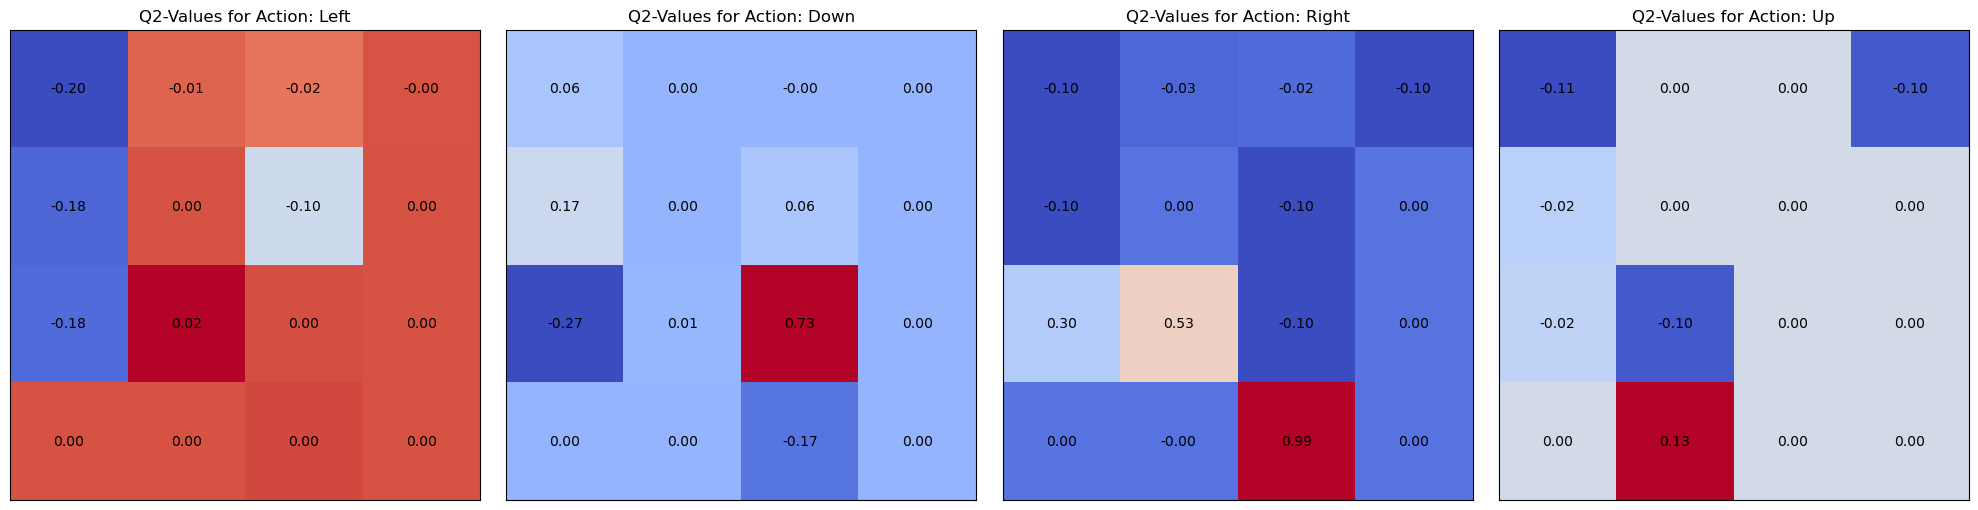

In [8]:
# Visualize the Policy
import matplotlib.pyplot as plt

# Visualize State Values as a Heatmap
fig, axes = plt.subplots(1, nA, figsize=(20, 5))
actions = ["Left", "Down", "Right", "Up"]

for i in range(nA):
    Q_action = Q2[:, i].reshape((4, 4))
    ax = axes[i]
    cax = ax.matshow(Q_action, cmap="coolwarm")
    for (j, k), val in np.ndenumerate(Q_action):
        ax.text(k, j, f'{val:.2f}', ha='center', va='center', color='black')
    ax.set_title(f'Q2-Values for Action: {actions[i]}')
    ax.set_xticks([])
    ax.set_yticks([])

# fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.025, pad=0.04)
plt.tight_layout()
plt.show()

## When to utilize Double Q Learning

Utilize double q learning to minimize maximization bias. In traditional Q-learning, the max operator uses the same values to evaluate an action. This might make it likely to overestimate a value, which in return makes it overoptimistic. To solve this problem, you store 2 Q values. One Q value to determine the maximization action, while the other Q value determines the estimate of it's values. 

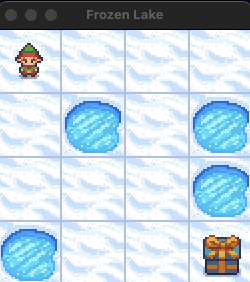

This is the layout of the map.